In [2]:
# Import required libraries
# Pandas is used for data manipulation
import pandas as pd

# matplotlib is used for plotting graphics
import matplotlib.pyplot as plt

# seaborn is used for plotting graphics
import seaborn

In [3]:
# Load data from CSV file
data = pd.read_csv('dataset.csv')

# Shows the first 5 rows of the dataset
data.head()

,date,jasmine,milk_tea,choco_milk,brown_sugar,nastar,strawberry_milk,manggo_milk,rose_milk,rose_milk_tea,...,lemon_mango,orange_lychee,orange_mango,mango_lychee,markisa_fruit,markisa_mango_fruit,passion_lychee_fruit,watermelon_mango_fruit,watermelon_lychee_fruit,sales_total
0,09/01/2024,108,5,8,5,0,2,2,0,0,...,0,0,0,0,1,0,0,0,0,956000
1,09/02/2024,96,2,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,602000
2,09/03/2024,75,1,5,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,543000
3,09/04/2024,63,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,480000
4,09/05/2024,77,1,1,2,0,3,2,1,0,...,0,0,0,0,0,0,0,0,0,613000


In [4]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

# Set 'date' column as index
data.set_index('date', inplace=True)

# Shows the first 5 rows of the dataset
data.head()

,jasmine,milk_tea,choco_milk,brown_sugar,nastar,strawberry_milk,manggo_milk,rose_milk,rose_milk_tea,lemon,...,lemon_mango,orange_lychee,orange_mango,mango_lychee,markisa_fruit,markisa_mango_fruit,passion_lychee_fruit,watermelon_mango_fruit,watermelon_lychee_fruit,sales_total
date,,,,,,,,,,,,,,,,,,,,,
2024-09-01,108,5,8,5,0,2,2,0,0,8,...,0,0,0,0,1,0,0,0,0,956000
2024-09-02,96,2,2,1,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,602000
2024-09-03,75,1,5,1,0,0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,543000
2024-09-04,63,0,1,1,0,0,1,0,0,4,...,0,0,0,0,0,0,0,0,0,480000
2024-09-05,77,1,1,2,0,3,2,1,0,4,...,0,0,0,0,0,0,0,0,0,613000


## 1. Time Series Analysis Plot

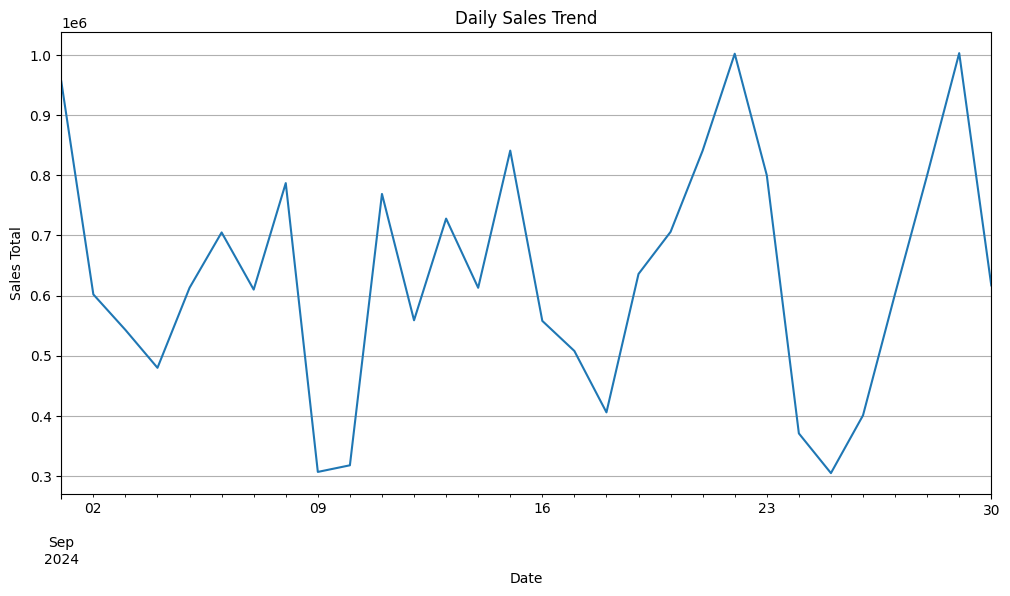

In [5]:
# Create a figure and a set of subplots
plt.figure(figsize=(12, 6))

# Plot the 'sales_total' column
data['sales_total'].plot()

# Set the title of the plot
plt.title('Daily Sales Trend')

# Set the x and y axis label
plt.xlabel('Date')
plt.ylabel('Sales Total')

# Display grid
plt.grid()

# Display the plot
plt.show()

## 2. Product Peformance analysis plot

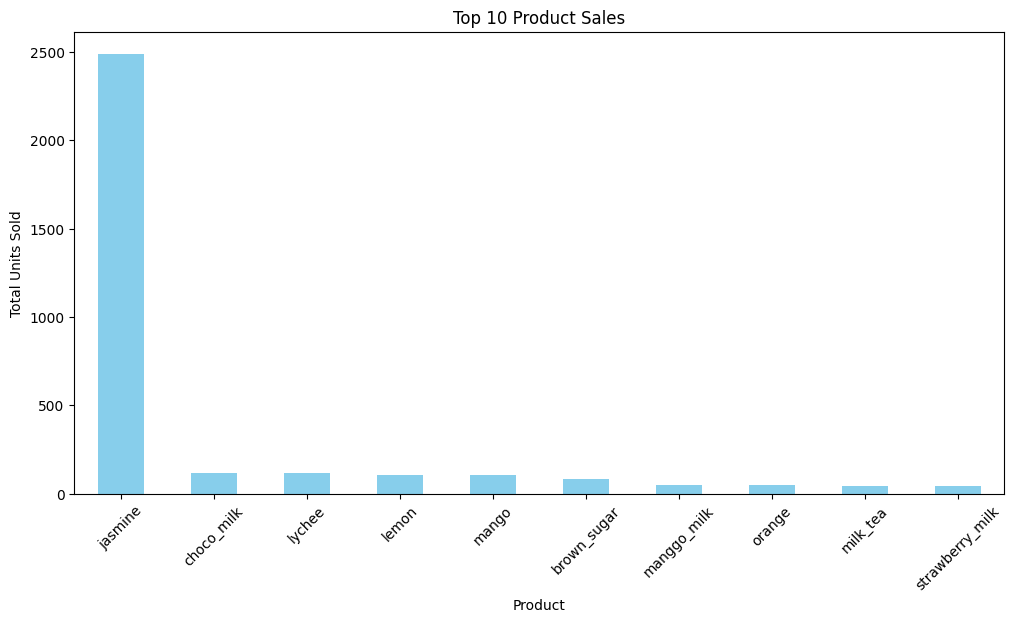

In [6]:
# Exclude 'sales_total' column for product performance analysis
product_sales = data.drop(columns=['sales_total'])

# Sum the sales of each product and sort them in descending order
total_product_sales = product_sales.sum().sort_values(ascending=False)

# Create a figure and a set of subplots
plt.figure(figsize=(12, 6))

# Plot the top 10 products with the highest sales using bar plot
total_product_sales.head(10).plot(kind='bar', color='skyblue')

# Set the title of the plot
plt.title("Top 10 Product Sales")

# Set the x and y axis label
plt.xlabel('Product')
plt.ylabel('Total Units Sold')

# Add rotation to the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

## 3. Correction Analysis Plot

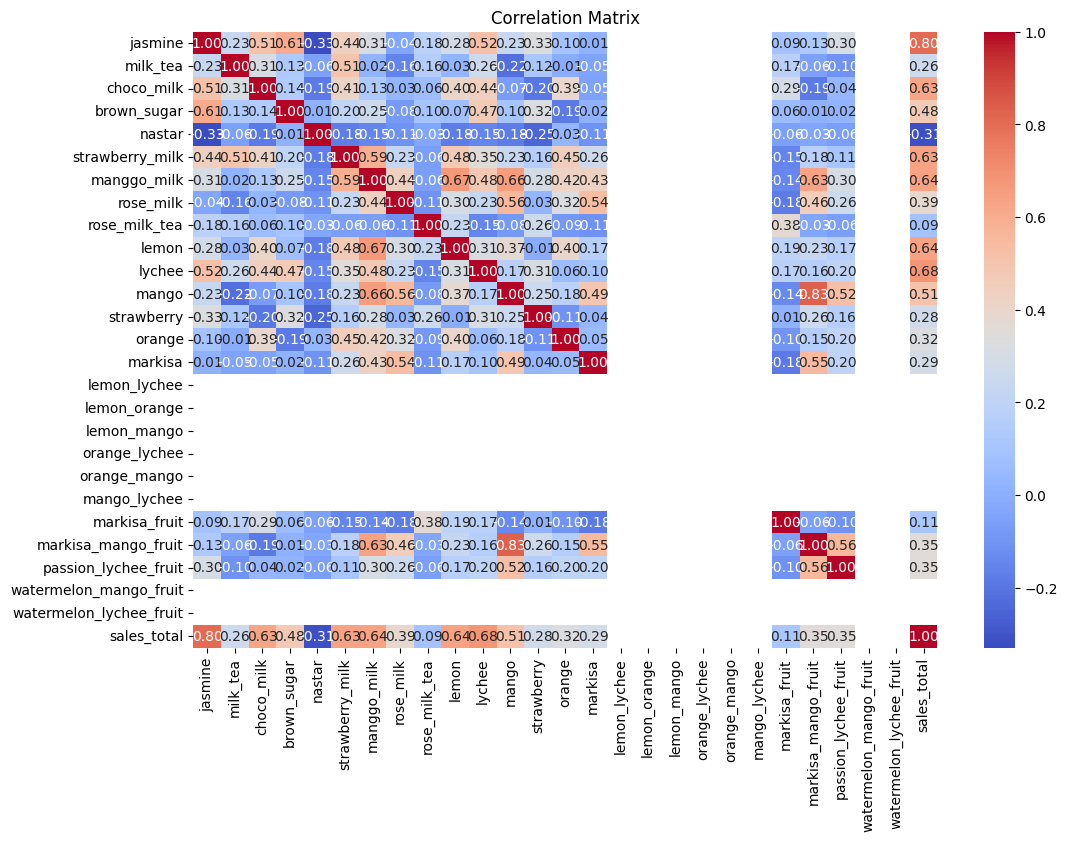

In [7]:
# Correlation between products and total sales
correlation_matrix = data.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [9]:
threshold = 0.7
bundling_opportunities = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1.0)]

print("Bundling Opportunities (Product Pairs with Correlation > 0.7):")
print(bundling_opportunities.dropna(how='all', axis=0).dropna(how='all', axis=1))

Bundling Opportunities (Product Pairs with Correlation > 0.7):
                      jasmine     mango  markisa_mango_fruit  sales_total
jasmine                   NaN       NaN                  NaN     0.803512
mango                     NaN       NaN             0.830702          NaN
markisa_mango_fruit       NaN  0.830702                  NaN          NaN
sales_total          0.803512       NaN                  NaN          NaN
